# Регрессии
В данной лекции мы рассмотрим регрессионные модели, а именно линейную и логистическую регрессию. Изучим базовые математические формулы и их пояснения, не углубляясь в сложные детали решений. Также рассмотрим реализацию этих моделей на языке Python с соответствующими примерами. Обсудим гиперпараметры, метрики качества, методы предотвращения переобучения и наглядно покажем, как выглядит переобучение.

Подробней о регрессии можно почитать [тут](https://habr.com/ru/companies/ods/articles/323890/). 

Спойлер: там много математики и еще больше примеров!

# Линейная Регрессия

Линейная регрессия моделирует зависимость между независимыми переменными 𝑥 и зависимой переменной 𝑦 путем подбора линейной функции.

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \varepsilon$$

- $y$ — зависимая переменная (целевой показатель).

- $x_i$ — независимые переменные (факторы).

-  $\beta_0$ — свободный член (константа)  

- $\beta_i$ — коэффициенты регрессии (веса модели).

- $\varepsilon$ — случайная ошибка (остаток).

Каждый коэффициент $\beta_i$ показывает влияние соответствующей независимой переменной $x_i$ на зависимую переменную $y$. Цель линейной регрессии — найти такие коэффициенты $\beta_i$, которые минимизируют разницу между предсказанными и реальными значениями $y$.

## Разновидности Линейной Регрессииь.

### Простая линейная регрессия - одна независимая переменная.

Простая линейная регрессия используется для моделирования линейной зависимости между двумя переменными: независимой переменной 𝑥 и зависимой переменной 𝑦.

$$y = \beta_0 + \beta_1 x + \varepsilon$$

где:

- $y$ — зависимая переменная.

- $x$ — независимая переменная.

- $\beta_0$ — свободный член (интерцепт).

- $\beta_1$ — коэффициент наклона линии регрессии.

- $\varepsilon$ — случайная ошибка.


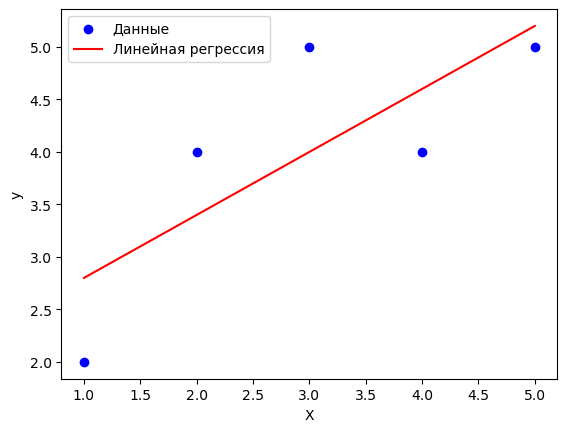

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерируем данные
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Создаем модель
model = LinearRegression()
model.fit(X, y)

# Предсказания
y_pred = model.predict(X)

# Визуализация
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, y_pred, color='red', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Множественная Линейная Регрессия

Множественная линейная регрессия моделирует линейную зависимость между одной зависимой переменной $y$ и несколькими независимыми переменными $x_1, x_2,..., x_n$

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \varepsilon$$

где:

- $y$ — предсказанное значение целевой переменной.

- $x_i$ — независимые переменные (признаки).

- $\beta_0$ — свободный член (пересечение с осью y).

- $\beta_i$ — коэффициенты модели, которые показывают, как каждый признак влияет на целевую переменную.

- $\varepsilon$ — случайная ошибка.



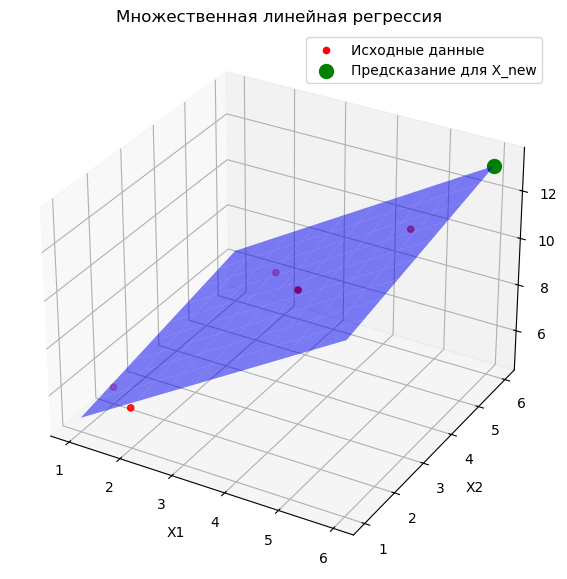

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Генерация данных
X = np.array([
    [1, 2],
    [2, 1],
    [3, 4],
    [4, 3],
    [5, 5]
])
y = np.array([5, 6, 9, 10, 11])

# Создание модели
model = LinearRegression()
model.fit(X, y)

# Коэффициенты и свободный член
# print('Коэффициенты:', model.coef_)
# print('Свободный член:', model.intercept_)

# Предсказания для новой точки
X_new = np.array([[6, 6]])
y_pred = model.predict(X_new)
# print('Предсказание для X_new:', y_pred)

# Визуализация
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Разделение данных по признакам
x1 = X[:, 0]
x2 = X[:, 1]

# Плоскость регрессии
x1_surf, x2_surf = np.meshgrid(np.linspace(1, 6, 10), np.linspace(1, 6, 10))
y_surf = model.intercept_ + model.coef_[0] * x1_surf + model.coef_[1] * x2_surf

# Исходные точки данных
ax.scatter(x1, x2, y, color='red', label='Исходные данные')

# Плоскость регрессии
ax.plot_surface(x1_surf, x2_surf, y_surf, color='blue', alpha=0.5)

# Новая точка и ее предсказание
ax.scatter(X_new[0, 0], X_new[0, 1], y_pred, color='green', s=100, label='Предсказание для X_new')

# Подписи осей
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Множественная линейная регрессия')

# Легенда
ax.legend()

# Показ графика
plt.show()


### Полиномиальная Регрессия

Полиномиальная регрессия используется для моделирования нелинейной зависимости между независимой переменной $x$ и зависимой переменной $y$ путем включения степенных членов $x_2, x_3,...$

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \varepsilon$$

где:

- $y$ — зависимая переменная.

- $x$ — независимая переменная.

- $\beta_0$ — свободный член.

- $\beta_1, \beta_2$ — коэффициенты модели.

- $\varepsilon$ — случайная ошибка.

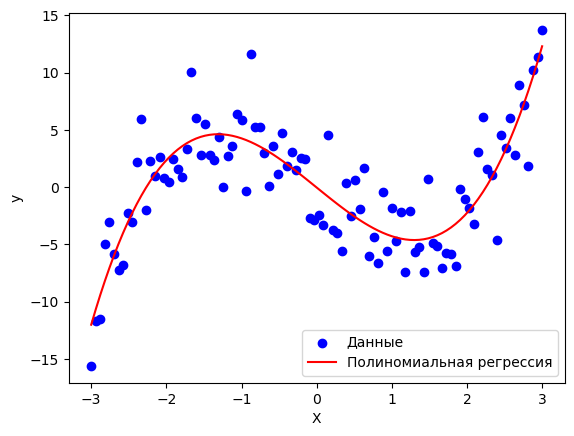

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Генерируем нелинейные данные
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 5*X + np.random.randn(100, 1)*3

# Преобразование признаков для полиномиальной регрессии
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Создаем модель
model = LinearRegression()
model.fit(X_poly, y)

# Предсказания
y_pred = model.predict(X_poly)

# Визуализация
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, y_pred, color='red', label='Полиномиальная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Гиперпараметры
- Норма регуляризации: определяет тип регуляризации (L1 или L2). В Python `Lasso` или `Ridge` из соответствующих модулей библиотеки scikit-learn (`from sklearn.linear_model import Lasso, Ridge`)
- Коэффициент регуляризации (𝛼) - степень воздействия регуляризации. В Python параметре `alpha`
- Максимальное число итераций - для методов оптимизации. В Python параметр `max_iter`

## Метрики Качества:
- Среднеквадратичная ошибка (`MSE`): $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

- Средняя абсолютная ошибка (MAE): $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

- Коэффициент детерминации ($R^2$): $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$



## Предотвращение Переобучения
- Lasso (L1-регуляризация)
- Ridge (L2-регуляризация)
- Кросс-валидация: оценка модели на разных подвыборках данных.
- Ранняя остановка: прекращение обучения при ухудшении метрик на валидационной выборке.


### Функция потерь с Lasso (L1-регуляризацией):

$\text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} |\beta_j|$

Где:

- $\text{Loss}$ — общая функция потерь с учетом регуляризации.
- $\text{MSE}$ — среднеквадратичная ошибка: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
  
- $\alpha$ — коэффициент регуляризации, контролирующий степень штрафа за сложность модели.
- $\beta_j$ — коэффициенты модели.
- $|\beta_j|$ — абсолютное значение коэффициента $\beta_j$.

**Пояснение:**

L1-регуляризация добавляет к функции потерь сумму абсолютных значений коэффициентов, умноженную на коэффициент регуляризации $\alpha$. Это способствует обнулению некоторых коэффициентов, что приводит к разреженной модели и может улучшить обобщающую способность модели.

### Функция потерь с L2-регуляризацией:

$\text{Loss} = \text{MSE} + \alpha \sum_{j=1}^{n} \beta_j^2$

Где:

- $\text{Loss}$ — общая функция потерь с учетом регуляризации.
- $\text{MSE}$ — среднеквадратичная ошибка:
  
  $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
  
- $\alpha$ — коэффициент регуляризации.
- $\beta_j$ — коэффициенты модели.
- $\beta_j^2$ — квадрат коэффициента $\beta_j$.

**Пояснение:**

L2-регуляризация добавляет к функции потерь сумму квадратов коэффициентов, умноженную на коэффициент регуляризации $\alpha$. Это предотвращает переобучение путем штрафования больших значений коэффициентов, делая модель более устойчивой к шуму в данных.

**Пример Переобучения**

Переобучение происходит, когда модель слишком точно подстраивается под обучающие данные, теряя способность обобщать на новые данные.

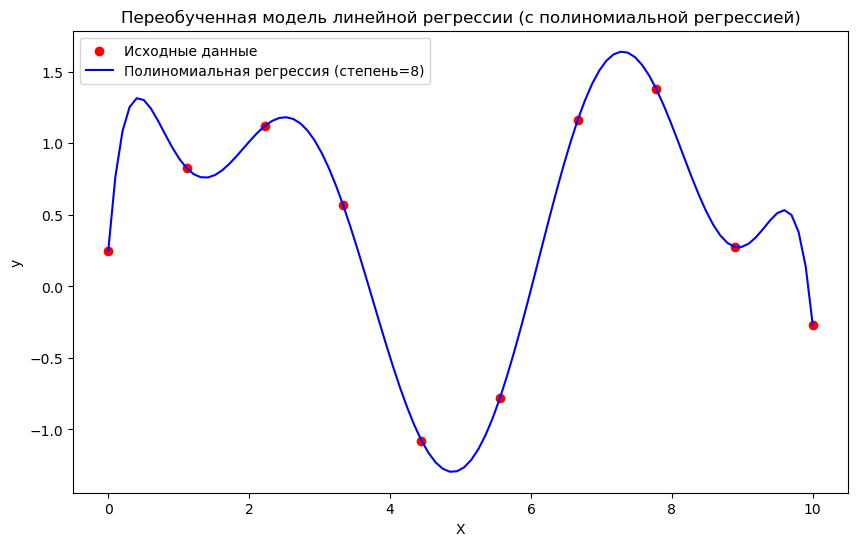

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Генерация синтетических данных
np.random.seed(42)
X = np.linspace(0, 10, 10).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

# Модель линейной регрессии и полиномиальной регрессии (чтобы показать переобучение)
degree = 8  # Степень полинома для сильного переобучения
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Точки для визуализации предсказаний модели
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Визуализация данных и модели
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Исходные данные')
plt.plot(X_test, y_pred, label=f'Полиномиальная регрессия (степень={degree})', color='blue')
plt.title('Переобученная модель линейной регрессии (с полиномиальной регрессией)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**Пример предотвращения переобучения с регуляризацией ridge**

F:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.73398e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


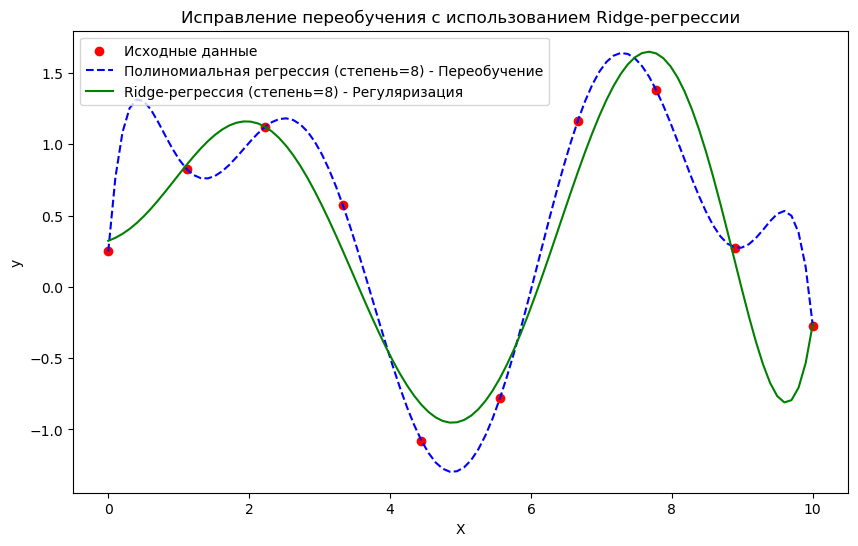

In [7]:
from sklearn.linear_model import Ridge

# Модель Ridge-регрессии с регуляризацией
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
ridge_model.fit(X, y)

# Предсказания для Ridge-регрессии
y_ridge_pred = ridge_model.predict(X_test)

# Визуализация данных и модели Ridge-регрессии
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Исходные данные')
plt.plot(X_test, y_pred, label=f'Полиномиальная регрессия (степень={degree}) - Переобучение', color='blue', linestyle='dashed')
plt.plot(X_test, y_ridge_pred, label=f'Ridge-регрессия (степень={degree}) - Регуляризация', color='green')
plt.title('Исправление переобучения с использованием Ridge-регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

На графике показаны результаты до и после использования Ridge-регрессии. Модель, регуляризованная с помощью Ridge, гораздо менее склонна к переобучению (зелёная линия). Она лучше улавливает общую тенденцию данных, чем первоначальная полиномиальная регрессия (синяя пунктирная линия), которая была сильно переобучена. Регуляризация позволила сгладить модель и сделать её более устойчивой к шуму в данных.

- Ridge-регрессия добавляет штраф за слишком большие коэффициенты регрессии через параметр 𝛼. Этот штраф контролирует величину весов, что делает модель менее склонной к чрезмерной адаптации к данным.
- Регуляризация предотвращает чрезмерное изменение весов регрессии и тем самым уменьшает гибкость модели. Это позволяет модели лучше обобщать закономерности в данных, а не запоминать каждую точку. В результате, модель перестаёт пытаться идеально подогнать данные, и линия становится более сглаженной.

# Логистическая Регрессия

Логистическая регрессия применяется для задач классификации и оценивает вероятность принадлежности наблюдения к определенному классу.

$$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}}$$
где:

- $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$
- $\sigma(z)$ - сигмоидная функция, переводящая значение в диапазон от 0 до 1.



Сигмоидная функция используется в **логистической регрессии** для преобразования линейной комбинации входных признаков в вероятность принадлежности к определенному классу.

Формула сигмоидной функции:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Где:

- $\sigma(z)$ — вероятность того, что наблюдение принадлежит к классу 1.
- $z$ — линейная комбинация признаков:
  
  $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$
  
- $\beta_0$ — свободный член (интерцепт).
- $\beta_i$ — коэффициенты модели.
- $x_i$ — значения независимых переменных.
- $e$ — основание натурального логарифма (приблизительно 2.71828).

**Пояснение:**

- **Линейная Комбинация ($z$):**

  Логистическая регрессия вычисляет линейную комбинацию входных признаков и коэффициентов, аналогично линейной регрессии.

- **Сигмоидная Функция ($\sigma(z)$):**

  Преобразует линейную комбинацию $z$ в значение от 0 до 1, которое интерпретируется как вероятность. Это позволяет модели решать задачи бинарной классификации.

- **Интерпретация Результата:**

  - Если $\sigma(z) > 0.5$, модель прогнозирует класс 1.
  - Если $\sigma(z) \leq 0.5$, модель прогнозирует класс 0.

**Применение:**

Сигмоидная функция обеспечивает непрерывный выход, что позволяет использовать логистическую регрессию для оценки вероятностей и принятия решений на их основе. Она является ключевым компонентом в моделях, где требуется предсказать вероятность события, например, вероятность того, что клиент совершит покупку.


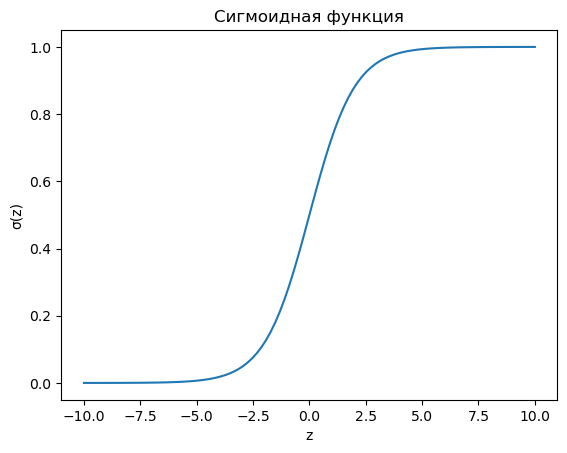

In [52]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Пример использования
z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

# Визуализация сигмоидной функции
import matplotlib.pyplot as plt
plt.plot(z, sigma_z)
plt.title('Сигмоидная функция')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.show()

## Разновидности Логистической регрессии

### Бинарная Логистическая Регрессия

Используется, когда целевая переменная имеет два возможных значения (класса), например, "да" или "нет", "1" или "0".

$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}}$

где:
- $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$
- $\sigma(z)$ — сигмоидная функция, преобразующая линейную комбинацию признаков в вероятность от 0 до 1.


Применение
- Классификация спама в электронной почте.
- Прогнозирование оттока клиентов.
- Диагностика заболеваний (например, наличие или отсутствие болезни).

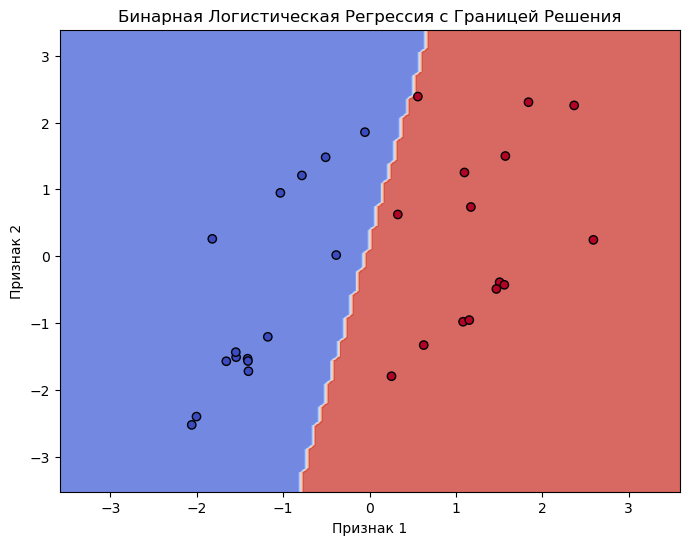

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Создание данных с 2 информативными признаками
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Модель бинарной логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Создание сетки для отображения границы решения
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Предсказания на сетке
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Граница решений
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title('Бинарная Логистическая Регрессия с Границей Решения')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

### Мультиномиальная Логистическая Регрессия
Используется, когда целевая переменная имеет более двух категорий без естественного порядка.

$P(y = k | x) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$
где:
- $z_k = \beta_{0k} + \beta_{1k} x_1 + \beta_{2k} x_2 + \dots + \beta_{nk} x_n$
- $K$ — общее число классов
- Каждому классу соответствует свой набор коэффициентов $𝛽_{𝑖𝑘}$

Применение
- Классификация видов растений.
- Прогнозирование предпочитаемого продукта из нескольких вариантов.


Предположим, у нас есть данные о выборе вида транспорта (например, 0 — "Автобус", 1 — "Машина", 2 — "Велосипед") на основе возраста и дохода человека. Мы можем построить мультиномиальную регрессионную модель для прогнозирования выбора вида транспорта.

Optimization terminated successfully.
         Current function value: 0.689643
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:       transport_choice   No. Observations:                  300
Model:                        MNLogit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Oct 2024   Pseudo R-squ.:                0.003009
Time:                        13:29:36   Log-Likelihood:                -206.89
converged:                       True   LL-Null:                       -207.52
Covariance Type:            nonrobust   LLR p-value:                    0.5356
transport_choice=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3554      0.457      0.777      0.437      -0.541       1.252
age  

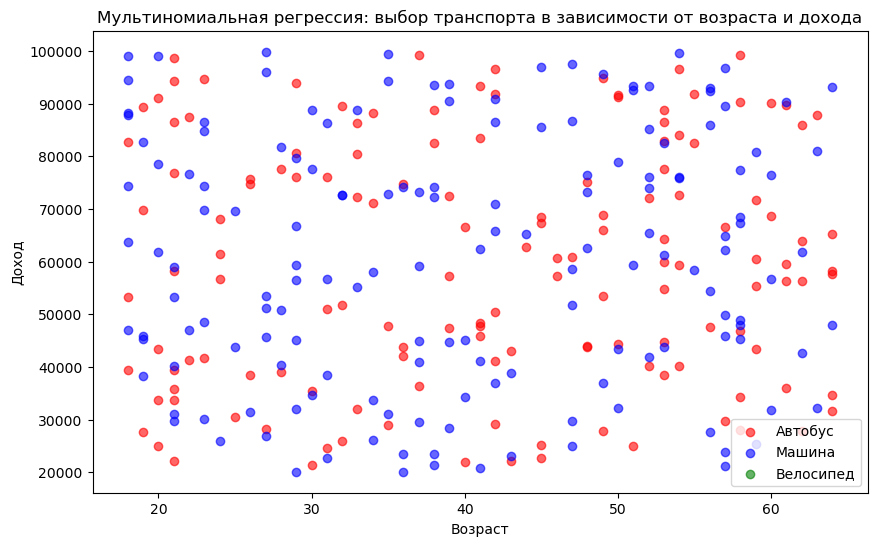

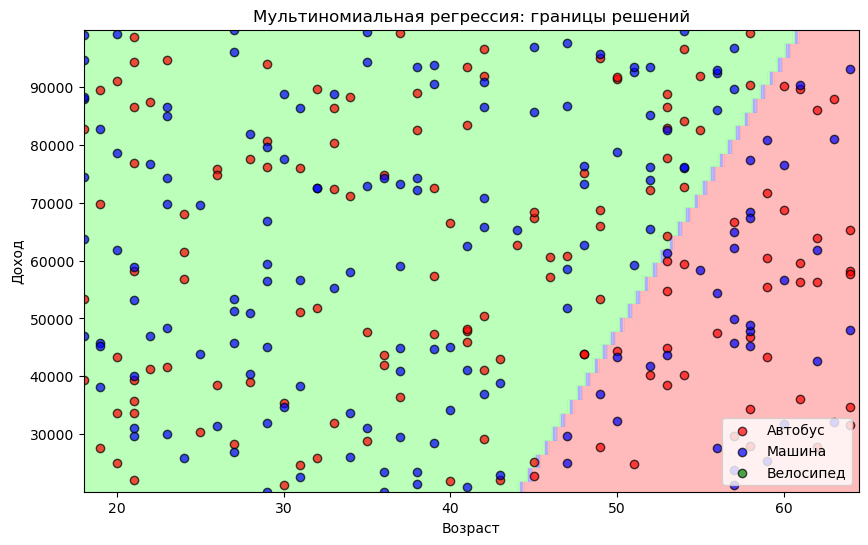

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Генерация данных
np.random.seed(0)
n_samples = 300
age = np.random.randint(18, 65, size=n_samples)
income = np.random.randint(20_000, 100_000, size=n_samples)

# Генерация вероятностей для категорий выбора транспорта: 0 - Автобус, 1 - Машина, 2 - Велосипед
prob_bus = 0.5 - 0.005 * age + 0.00001 * income
prob_car = 0.3 + 0.003 * age + 0.00001 * income
prob_bike = 1 - (prob_bus + prob_car)

# Создание матрицы вероятностей для каждого наблюдения
prob_matrix = np.vstack([prob_bus, prob_car, prob_bike]).T
prob_matrix = np.clip(prob_matrix, 0, 1)  # Обрезаем вероятности до диапазона [0, 1]
prob_matrix = prob_matrix / prob_matrix.sum(axis=1, keepdims=True)  # Нормализуем, чтобы вероятности суммировались до 1

# Генерация выбора транспорта на основе вероятностей
transport_choice = [np.argmax(np.random.multinomial(1, pvals)) for pvals in prob_matrix]

# Создаем DataFrame
data = pd.DataFrame({
    'age': age,
    'income': income,
    'transport_choice': transport_choice
})

# Определение мультиномиальной регрессии
X = sm.add_constant(data[['age', 'income']])
model = sm.MNLogit(data['transport_choice'], X)

# Обучение модели
result = model.fit()

# Печать результатов
print(result.summary())

# Визуализация: распределение данных
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
labels = ['Автобус', 'Машина', 'Велосипед']

for i, label in enumerate(labels):
    plt.scatter(data['age'][data['transport_choice'] == i], data['income'][data['transport_choice'] == i], 
                label=label, alpha=0.6, color=colors[i])

plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.legend()
plt.title('Мультиномиальная регрессия: выбор транспорта в зависимости от возраста и дохода')
plt.show()

# Функция для визуализации границ решений с уменьшенной сеткой
def plot_decision_boundary(X, y, model):
    h = 0.5  # увеличиваем шаг сетки, чтобы уменьшить размер данных
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    
    # Уменьшение диапазона данных для предотвращения MemoryError
    x_min, x_max = max(x_min, 18), min(x_max, 65)  # ограничим возраст до реальных данных
    y_min, y_max = max(y_min, 20000), min(y_max, 100000)  # ограничим доход до реальных данных

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(sm.add_constant(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Отображение данных
    colors = ['red', 'blue', 'green']
    labels = ['Автобус', 'Машина', 'Велосипед']
    for i, label in enumerate(labels):
        plt.scatter(X[y == i, 1], X[y == i, 2], color=colors[i], label=label, edgecolor='k', alpha=0.7)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Возраст')
    plt.ylabel('Доход')
    plt.legend(loc='lower right')
    plt.title('Мультиномиальная регрессия: границы решений')
    plt.show()

# Вызов функции для визуализации границ решений
X_values = X.values  # данные X
y_values = data['transport_choice'].values  # истинные метки
plot_decision_boundary(X_values, y_values, result)

1. Границы решений:

График показывает разделяющие границы между тремя категориями (Автобус, Машина, Велосипед) на основе двух признаков: возраста (по оси X) и дохода (по оси Y).
Различные цветовые области на графике показывают, какая категория вероятнее всего будет предсказана моделью в зависимости от возраста и дохода.
Красная область: наибольшая вероятность выбора категории "Автобус".
Зелёная область: наибольшая вероятность выбора категории "Машина".
Каждая область представляет собой решение модели на основе двух признаков: возраста и дохода.
Точки данных:

2. Точки на графике представляют реальные данные.

Цвет каждой точки указывает на фактический выбор транспорта (красный для "Автобус", синий для "Машина", зелёный для "Велосипед").
Как видно, данные рассредоточены в пределах различных областей решений, но не все они соответствуют предсказанным областям, что является нормальным для модели, так как она делает обобщения и не всегда на 100% соответствует реальным данным.

3. Значение разделяющих областей:

Области отображают, где модель прогнозирует одну категорию чаще, чем другую, на основе значений возраста и дохода.
Например, если человек находится в зелёной области (низкий возраст и доход), модель вероятнее всего предскажет "Машину".
В красной области (высокий возраст и доход) модель предскажет "Автобус".

### Порядковая (Ордеральная) Логистическая Регрессия
Применяется, когда целевая переменная имеет более двух категорий с естественным порядком.

$\log\left( \frac{P(y \leq k | x)}{P(y > k | x)} \right) = \theta_k - (\beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)$

где:
- $\theta_k$ — пороговое значение для категории k.

Применение
- Оценка уровня удовлетворенности (например, "плохо", "средне", "хорошо").
- Классификация степени тяжести заболевания.


Предположим, у нас есть данные об уровне удовлетворенности клиентов, измеренной по шкале (1 — "Недоволен", 2 — "Нейтрален", 3 — "Удовлетворен"). Мы хотим предсказать уровень удовлетворенности на основе возраста и дохода клиента.

                             OrderedModel Results                             
Dep. Variable:           satisfaction   Log-Likelihood:                -185.87
Model:                   OrderedModel   AIC:                             381.7
Method:            Maximum Likelihood   BIC:                             398.2
Date:                Tue, 01 Oct 2024                                         
Time:                        13:20:03                                         
No. Observations:                 200                                         
Df Residuals:                     195                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0239      0.010      2.315      0.021       0.004       0.044
income      8.225e-05   8.41e-06      9.774      0.0

F:\Anaconda\Lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
F:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


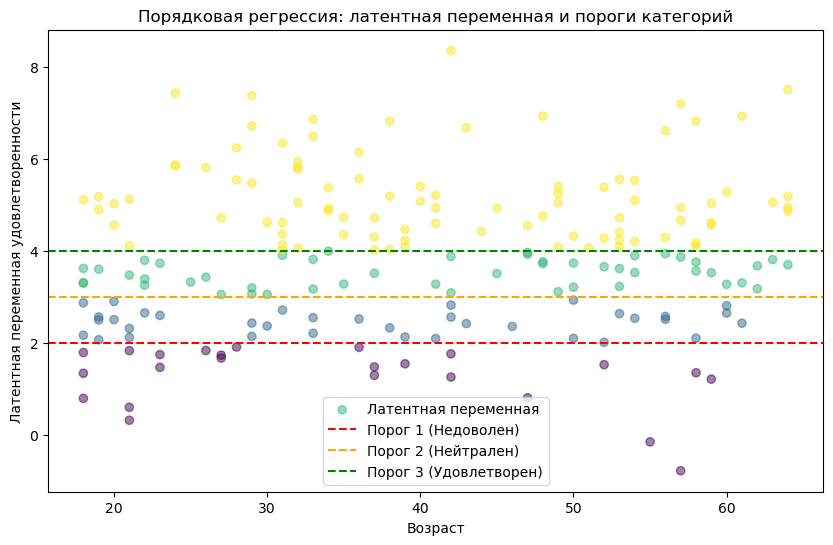

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(0)
n_samples = 200
age = np.random.randint(18, 65, size=n_samples)
income = np.random.randint(20_000, 100_000, size=n_samples)

# Генерация уровня удовлетворенности: 1 - Недоволен, 2 - Нейтрален, 3 - Удовлетворен
cutoffs = [2, 3, 4]  # пороговые значения для категорий
latent_variable = 0.02 * age + 0.00005 * income + np.random.randn(n_samples)
satisfaction = np.digitize(latent_variable, cutoffs)

# Создаем DataFrame
data = pd.DataFrame({
    'age': age,
    'income': income,
    'satisfaction': satisfaction
})

# Определение модели порядковой регрессии
model = OrderedModel(data['satisfaction'],
                     data[['age', 'income']],
                     distr='logit')

# Обучение модели
result = model.fit()

# Печать результатов
print(result.summary())

# Предсказание вероятностей для новых данных
predicted_probs = result.predict([[40, 50000], [30, 60000]])
print("\nПредсказанные вероятности для 40 лет и дохода 50000: ", predicted_probs[0])
print("Предсказанные вероятности для 30 лет и дохода 60000: ", predicted_probs[1])

# Визуализация: зависимости латентной переменной от возраста
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], latent_variable, alpha=0.5, c=satisfaction, cmap='viridis', label="Латентная переменная")
plt.axhline(y=cutoffs[0], color='red', linestyle='--', label='Порог 1 (Недоволен)')
plt.axhline(y=cutoffs[1], color='orange', linestyle='--', label='Порог 2 (Нейтрален)')
plt.axhline(y=cutoffs[2], color='green', linestyle='--', label='Порог 3 (Удовлетворен)')
plt.xlabel('Возраст')
plt.ylabel('Латентная переменная удовлетворенности')
plt.title('Порядковая регрессия: латентная переменная и пороги категорий')
plt.legend()
plt.show()

1. Тип данных:

Порядковая логистическая регрессия применяется, когда целевая переменная имеет упорядоченные категории. Например, категории могут быть "низкий", "средний", "высокий", или уровни оценки от 1 до 5, где порядок важен, но точные расстояния между значениями неизвестны.

2. Модель логистической регрессии:

Порядковая логистическая регрессия является обобщением обычной бинарной логистической регрессии, где целевая переменная имеет более двух классов, и эти классы имеют определённый порядок.
В отличие от мультиномиальной логистической регрессии, которая предполагает, что классы неупорядочены, порядковая регрессия учитывает, что между классами существует отношение порядка.

3. Функция распределения:

В порядковой логистической регрессии используется функция логистического распределения для оценки вероятности принадлежности к каждой из упорядоченных категорий. В коде, который мы использовали, это был параметр distr='logit', что указывает на использование логистической функции для оценки вероятностей.

4. Интерпретация коэффициентов:

Коэффициенты в порядковой логистической регрессии показывают влияние признаков на вероятность того, что целевая переменная перейдет на следующий уровень (или останется на текущем уровне). Например, положительный коэффициент указывает на то, что с увеличением значения признака увеличивается вероятность принадлежности к более высокому уровню (классу).

### Иерархическая (Многоуровневая) Логистическая Регрессия

$P(y_{ij}=1 | x_{ij}) = \sigma(\beta_0 + u_j + \beta_1 x_{ij})$
где:

- $y_{i,j}$ — результат для объекта 𝑖 в группе 𝑗
- $u_j$ — случайный эффект для группы 𝑗.

Применение
- Образовательные исследования (ученики в классах).
- Медицина (пациенты в разных больницах).


Предположим, у нас есть данные об учениках, где каждый ученик принадлежит к определенной школе, и мы хотим спрогнозировать оценку ученика, основываясь на его характеристиках и характеристиках школы.

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: student_score
No. Observations: 500     Method:             REML         
No. Groups:       10      Scale:              0.9441       
Min. group size:  50      Log-Likelihood:     -716.5982    
Max. group size:  50      Converged:          Yes          
Mean group size:  50.0                                     
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         2.662    0.324  8.210 0.000  2.026  3.297
student_ability   0.494    0.044 11.239 0.000  0.408  0.580
Group Var         1.032    0.515                           



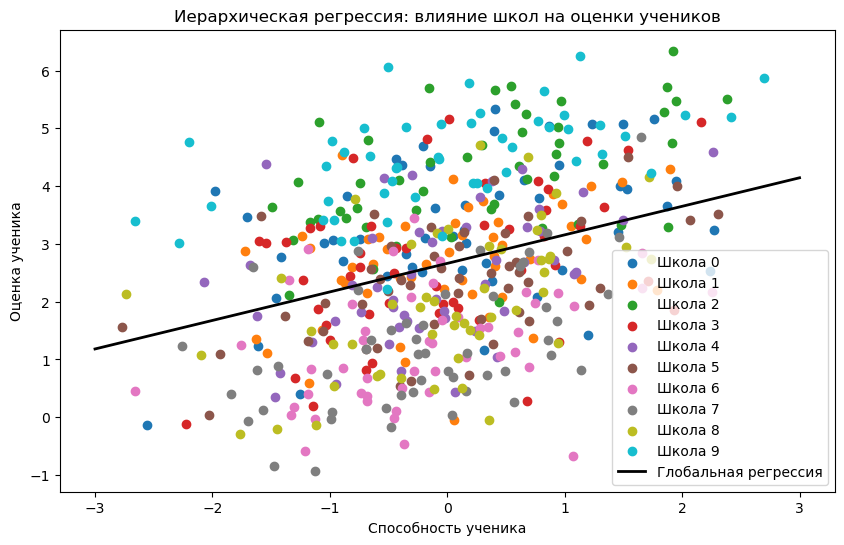

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(0)
num_schools = 10
num_students_per_school = 50
school_ids = np.repeat(np.arange(num_schools), num_students_per_school)
student_ability = np.random.randn(num_schools * num_students_per_school)
school_effect = np.random.randn(num_schools)
school_effects = school_effect[school_ids]
student_scores = 3 + 0.5 * student_ability + school_effects + np.random.randn(num_schools * num_students_per_school)

# Создаем DataFrame
data = pd.DataFrame({
    'school_id': school_ids,
    'student_ability': student_ability,
    'student_score': student_scores
})

# Определение иерархической модели
model = mixedlm("student_score ~ student_ability", data, groups=data["school_id"])
result = model.fit()

# Печать результатов
print(result.summary())

# Визуализация
plt.figure(figsize=(10, 6))
for school in range(num_schools):
    subset = data[data['school_id'] == school]
    plt.scatter(subset['student_ability'], subset['student_score'], label=f'Школа {school}')
    
# Прямая линии регрессии
x_vals = np.linspace(-3, 3, 100)
y_vals = result.fe_params['Intercept'] + result.fe_params['student_ability'] * x_vals
plt.plot(x_vals, y_vals, color='black', label='Глобальная регрессия', linewidth=2)

plt.xlabel('Способность ученика')
plt.ylabel('Оценка ученика')
plt.legend()
plt.title('Иерархическая регрессия: влияние школ на оценки учеников')
plt.show()

## Метрики Качества:

### Матрица ошибок
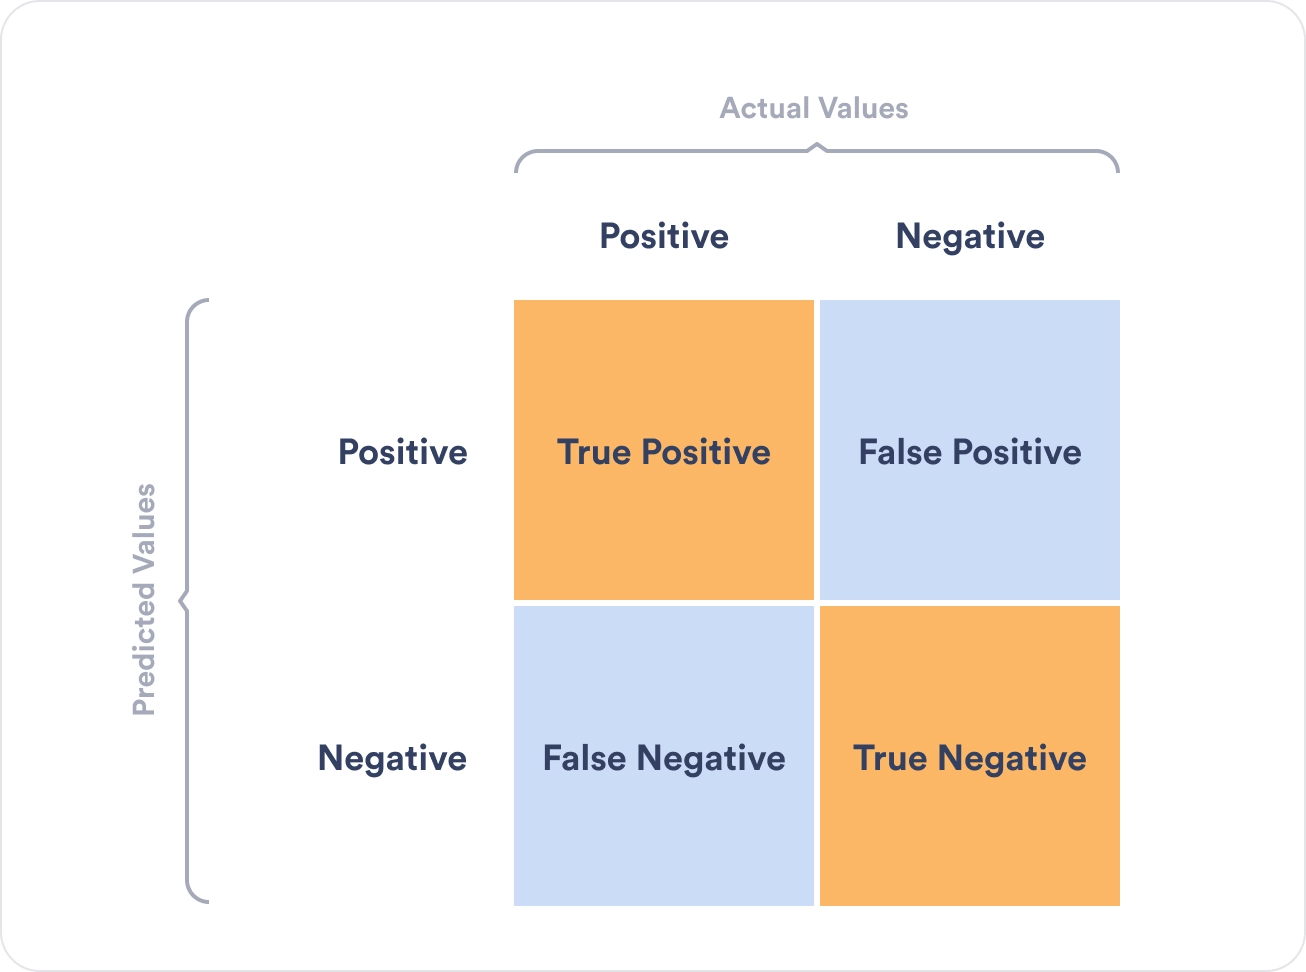


В матрице представлены четыре категории предсказаний, которые может сделать модель:

- True Positive (Истинно положительные) — модель правильно предсказала положительный класс, и фактически это тоже был положительный класс.

Это случаи, когда как реальный класс, так и предсказание модели — положительные. Например, модель правильно классифицировала пациента как больного.

- False Negative (Ложно отрицательные) — модель предсказала отрицательный класс, хотя на самом деле класс был положительным.

Это ошибка модели, когда она "пропустила" положительный класс. Например, модель неправильно классифицировала больного пациента как здорового.

- False Positive (Ложно положительные) — модель предсказала положительный класс, но фактически это был отрицательный класс.

Это ошибка, когда модель предсказала положительный результат, хотя фактически результат был отрицательным. Например, модель ошибочно классифицировала здорового пациента как больного.

- True Negative (Истинно отрицательные) — модель правильно предсказала отрицательный класс, и фактически это был отрицательный класс.

Это случаи, когда и реальный класс, и предсказание модели — отрицательные. Например, модель правильно классифицировала здорового пациента как здорового.

- Точность (Accuracy): доля правильных предсказаний $$\frac{TP}{TP *FP}$$
- precision (точность): $$\frac{TP}{TP + FP}$$

- recall (полнота: $$\frac{TP}{TP + FN}$$

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

- F1-мера: $$2 * \frac{Precision * Recall}{Precision + Recall}$$

Подробнее про метрики можно почитать тут: [https://habr.com/ru/companies/ods/articles/328372/])

## Предотвращение Переобучения
- Регуляризация: добавление штрафа за величину коэффициентов.
- Кросс-валидация: оценка стабильности модели на разных подвыборках.

## Гиперпараметры

- Коэффициент регуляризации (𝐶) - обратная величина коэффициента регуляризации (𝛼). В Python это параметр `C`
- Тип регуляризации - L1 (`penalty`='l1') или L2(`penalty`='l2'). 
- Максимальное число итераций - влияет на сходимость алгоритма. В Python это `max_iter`

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Логистическая регрессия без регуляризации (переобученная модель)
model_no_reg = LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000)
model_no_reg.fit(X_train, y_train)

# Предсказания для тестовой выборки
y_pred_no_reg = model_no_reg.predict(X_test)

# Метрики для модели без регуляризации
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)
precision_no_reg = precision_score(y_test, y_pred_no_reg)
recall_no_reg = recall_score(y_test, y_pred_no_reg)
f1_no_reg = f1_score(y_test, y_pred_no_reg)

# Вывод метрик для модели без регуляризации
print("Модель без регуляризации (переобученная):")
print(f"Accuracy: {accuracy_no_reg:.4f}")
print(f"Precision: {precision_no_reg:.4f}")
print(f"Recall: {recall_no_reg:.4f}")
print(f"F1 Score: {f1_no_reg:.4f}")

Модель без регуляризации (переобученная):
Accuracy: 0.8200
Precision: 0.8284
Recall: 0.7817
F1 Score: 0.8043


F:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [8]:
# Логистическая регрессия с L2-регуляризацией
model_with_reg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model_with_reg.fit(X_train, y_train)

# Предсказания для тестовой выборки
y_pred_with_reg = model_with_reg.predict(X_test)

# Метрики для модели с регуляризацией
accuracy_with_reg = accuracy_score(y_test, y_pred_with_reg)
precision_with_reg = precision_score(y_test, y_pred_with_reg)
recall_with_reg = recall_score(y_test, y_pred_with_reg)
f1_with_reg = f1_score(y_test, y_pred_with_reg)

# Вывод метрик для модели с регуляризацией
print("\nМодель с регуляризацией:")
print(f"Accuracy: {accuracy_with_reg:.4f}")
print(f"Precision: {precision_with_reg:.4f}")
print(f"Recall: {recall_with_reg:.4f}")
print(f"F1 Score: {f1_with_reg:.4f}")



Модель с регуляризацией:
Accuracy: 0.8233
Precision: 0.8296
Recall: 0.7887
F1 Score: 0.8087
